In [46]:
import pandas as pd
import matplotlib.pyplot as plt


In [47]:
DS=pd.read_csv("data_set.csv")
DS.sample(3)

,Category,Message
3177,ham,Havent still waitin as usual... Ü come back sc...
1929,spam,Call from 08702490080 - tells u 2 call 0906635...
5493,ham,I think if he rule tamilnadu..then its very to...


In [48]:
DS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [49]:

# dimension of dataset
print(DS.shape)

(5572, 2)


In [50]:
# Number of non empty records in a record
DS.count

<bound method DataFrame.count of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [51]:
DS.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


In [52]:
# display categorical data
DS['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [53]:
# show proportion of categorical data
DS['Category'].value_counts(normalize=True)

ham     0.865937
spam    0.134063
Name: Category, dtype: float64

ham     0.865937
spam    0.134063
Name: Category, dtype: float64


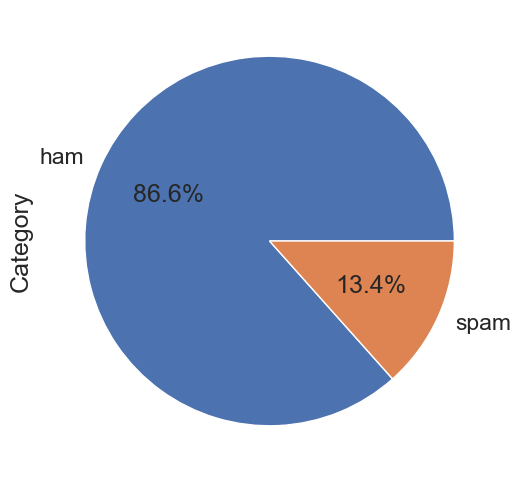

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
prop= DS.Category.value_counts(normalize=True)
print(prop)
prop.plot(kind="pie",figsize=(6,6),autopct='%1.1f%%')
plt.show()

In [55]:
data={'degree':[
    'bachelor',
    'phd',
    'masters',
    'bachelor',
    'phd',
    'masters']}
tabular_data=pd.DataFrame(data)
print(tabular_data)

     degree
0  bachelor
1       phd
2   masters
3  bachelor
4       phd
5   masters


In [56]:
import category_encoders as ce
# We have imported a module that we use to encode our data ordinally as follows or using one-hot encoding

In [57]:
encoder= ce.OrdinalEncoder(cols=['degree'],mapping=[{'col':'degree', # We are creating an object that we use to encode different data sets based on our mapping
                                                'mapping':{
                                                    'none':0,
                                                    'bachelor':1, 
                                                    'masters':2,
                                                    'phd':3
                                                }}])
# the cols is for the name of the column and the mapping is the numerical value of the unique data items we have
# We use this numerical ordinal encoding of our data so that it is easier for our machione to read and understand the given data
# and I believe it saves us time as well
encoded_data=encoder.fit_transform(tabular_data) # Using the 'encoder' encoding object we have created, we are transforming our tabular data in an encoded tabular data
encoded_data

,degree
0,1
1,3
2,2
3,1
4,3
5,2


In [58]:
colors={'color':[
    'green',
    'yellow',
    'red',
    'pink',
    'black'
]}

color_tabular=pd.DataFrame(colors)
color_tabular

,color
0,green
1,yellow
2,red
3,pink
4,black


In [59]:
color_one_hot_encoder=ce.OneHotEncoder(cols='color',use_cat_names=True)
color_one_hot_encoded=color_one_hot_encoder.fit_transform(color_tabular)
color_one_hot_encoded

c:\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


,color_green,color_yellow,color_red,color_pink,color_black
0,1,0,0,0,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,0,1


In [60]:
# Since our dataset for the email spam detector is nominal data set, we use one hot encoding
DS_encoder=ce.OneHotEncoder(cols='Category',use_cat_names=True)
DS=DS_encoder.fit_transform(DS)
DS.sample(3)

c:\Python310\lib\site-packages\category_encoders\one_hot.py:145: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for cat_name, class_ in values.iteritems():


,Category_ham,Category_spam,Message
2405,1,0,Please give it 2 or i will pick it up on Tues...
4192,1,0,"Each Moment in a day,has its own value-Morning..."
2308,0,1,WIN a year supply of CDs 4 a store of ur choic...


In [61]:
# From the above table we can see that the values 0 and 1 are just dummy variables signifying if it is a spam or a ham
# but we can inherently define if a message is a spam or or not from the value of a ham, and vice versa
# This case is called dummy_variable_trap

# To avoid this we can drop one of the category features which is 'ham' in this case
# to do that 
DS=DS.drop(['Category_ham'],axis=1)
DS.sample(3)

,Category_spam,Message
2913,0,You didn't have to tell me that...now i'm thin...
4793,0,Gd luck 4 ur exams :-)
2850,1,YOUR CHANCE TO BE ON A REALITY FANTASY SHOW ca...


In [62]:
# To avoid sampling bias and to preserve the class portioning of the original data set and represent each class(y) in the training and 
# testing data sets we have to set the stratify attribute in the train_test_split function to y(the class/output/)
from sklearn.model_selection import train_test_split


x_train,x_test,y_train,y_test=train_test_split(DS.Message,
                                                DS.Category_spam,test_size=0.2,
                                                random_state=10,stratify=DS.Category_spam)
print("Ham spam proportion of train data set\n",
    y_train.value_counts(normalize=True),
    "Ham spam proportion of test data set\n",
    y_test.value_counts(normalize=True),
    "Ham spam proportion of full data set\n",
    DS['Category_spam'].value_counts(normalize=True))

Ham spam proportion of train data set
 0    0.865829
1    0.134171
Name: Category_spam, dtype: float64 Ham spam proportion of test data set
 0    0.866368
1    0.133632
Name: Category_spam, dtype: float64 Ham spam proportion of full data set
 0    0.865937
1    0.134063
Name: Category_spam, dtype: float64


Below cell is to practice how to use count vectorizer

In [63]:
# We overlooked something tho, we have to keep track of the repitition of each word in every message 
# and to do that, we use the countvectorizer from the sklearn library
from sklearn.feature_extraction.text import CountVectorizer # Import CountVectorizer class from sklearn library
document=["Hi dear friend how are you doing?",
          "Free gift you can win now now qas",
          "Hello friend you have class"] # prepare your document
# create an object for countvectorizer
vectorizer = CountVectorizer() 
# ready your document for transormation(indexing every word)
vectorizer.fit(document)
print(vectorizer.vocabulary_)
# transform the indexed document using your vectorizing object in to a vector (represent in sparse matrix)
vector=vectorizer.transform(document)
print("The Vectorized document is \n", vector.toarray())

{'hi': 10, 'dear': 3, 'friend': 6, 'how': 11, 'are': 0, 'you': 15, 'doing': 4, 'free': 5, 'gift': 7, 'can': 1, 'win': 14, 'now': 12, 'qas': 13, 'hello': 9, 'have': 8, 'class': 2}
The Vectorized document is 
 [[1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 1]
 [0 1 0 0 0 1 0 1 0 0 0 0 2 1 1 1]
 [0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1]]


In [64]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer()
x_train_count=vectorizer.fit_transform(x_train.values)
x_train_count.toarray()


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [65]:
# import multinomial naivebayes ML algorithm from sklearn.naive_bayes
from sklearn.naive_bayes import MultinomialNB
# we build our model(object of multinomialNB class) using the module we imported
model=MultinomialNB()
# train our model using the x_train_count and the y_train training datasets we have mined
model.fit(x_train_count,y_train)

MultinomialNB()

In [66]:
# to find the training accuracy of the model
model.score(x_train_count,y_train)

0.9932690150325331

In [67]:
# The above train test split method we have used is a bit inaccurate in telling us the correct
# accuracy of our model, therefore we have to take resamples of our data and do the training 
# by iterating through our sample making one as our testing subset, there are two ways to do that
# 1. is LEAVE ONE OUT CROSS VALIDATION
# 2. is K-folf cross validation
# but we will be using a stratified k-fold cross validation
from statistics import mean
from sklearn.model_selection import cross_val_score
cross=cross_val_score(model,x_train_count,y_train,cv=10, scoring="accuracy")
print("Accuracy of 10 fold samples respectively:\n",cross)
print("Mean Accuracy:\n",mean(cross))

Accuracy of 10 fold samples respectively:
 [0.97309417 0.97309417 0.98206278 0.98654709 0.98430493 0.95515695
 0.98206278 0.97752809 0.97752809 0.98426966]
Mean Accuracy:
 0.9775648712651785


In [68]:
# Assume in our imbalanced dataset with 1000 data points 900 spam and 100 ham, 
# if our model classifies all our data as spam then the accuracy will be 90%
# and that is not what we want. To solve this we need to implement confusion matrix
from sklearn.metrics import confusion_matrix
# since we have to make comparison with the actual output and the predicted output
# we have to store the the predicted result in an object
y_train_predicted= model.predict(x_train_count)
# then we have to generate the confusion matrix using our module
cm= confusion_matrix(y_train,y_train_predicted)
cm

array([[3851,    8],
       [  22,  576]], dtype=int64)

Text(23.75, 0.5, 'truth')

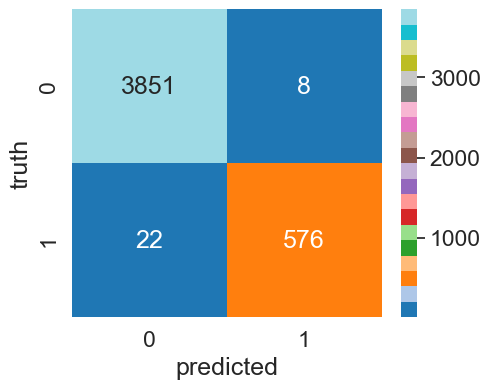

In [69]:
# to visualize our confusion matrix we need to use the seaborn module
import seaborn as sn
plt.figure(figsize=(5,4))
sn.set(font_scale=1.5)
sn.heatmap(cm,cmap="tab20",annot=True,fmt="d")
plt.xlabel('predicted')
plt.ylabel('truth')

In [70]:
# to calculate the accuracy of out model
from sklearn.metrics import accuracy_score

print("Accuracy of our model: ",accuracy_score(y_train,y_train_predicted))

Accuracy of our model:  0.9932690150325331


In [71]:
# to calculate incaccuracy of our model

print("Inaccuracy of our model: ",1-accuracy_score(y_train,y_train_predicted))

Inaccuracy of our model:  0.006730984967466935


In [72]:
# to calculate precision of our model
# we calculate precision of our model to avoid scenarios such as ...
# flagging a perfectly fine mail as a spam( False Negative)
from sklearn.metrics import precision_score
print("Precision of our model: ",precision_score(y_train,y_train_predicted))

Precision of our model:  0.9863013698630136


In [73]:
# And when we need to avoid False negatives.... such as when we flag a sick person(cancer) as negative
# while he is having a cancer, we need to use
# the recall, true positive or sensitivity method
# it means, out of all the positive classes, how many did our model actually predict correctly
# it is different from precision because precision is : out of all the the positives guesses how many of the guesses are actually positive
from sklearn.metrics import recall_score
print("The sensitivity of our model is: ", recall_score(y_train,y_train_predicted)) # the parameteres are positional arguments

The sensitivity of our model is:  0.9632107023411371


In [74]:
from sklearn.metrics import f1_score
print("The F-Measure of the model is: ", f1_score(y_train,y_train_predicted))


The F-Measure of the model is:  0.9746192893401014


In [75]:
# To provide the classification report having the above 4 metrics 
from sklearn.metrics import classification_report
print("CLASSIFICATION REPORT\n",classification_report(y_train,y_train_predicted))


CLASSIFICATION REPORT
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      3859
           1       0.99      0.96      0.97       598

    accuracy                           0.99      4457
   macro avg       0.99      0.98      0.99      4457
weighted avg       0.99      0.99      0.99      4457



Evaluation of our classifier model using the test data

In [76]:
# Vectorizing our X_test data
x_test_count= vectorizer.transform(x_test.values)
x_test_count.toarray()
x_test_count[:3]

<3x7704 sparse matrix of type '<class 'numpy.int64'>'
	with 45 stored elements in Compressed Sparse Row format>

In [77]:
# now we need to generate confusion matrix
y_test_predicted=model.predict(x_test_count)
cm_test= confusion_matrix(y_test,y_test_predicted)
cm_test

array([[961,   5],
       [  8, 141]], dtype=int64)

Text(23.75, 0.5, 'Truth')

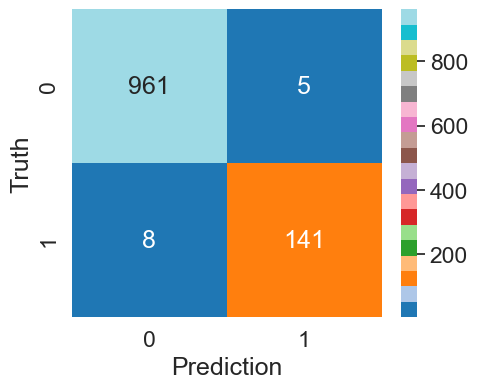

In [79]:
# Visualizing the confusion matrix of the test data results
plt.figure(figsize=(5,4))
sn.set(font_scale=1.5)
sn.heatmap(cm_test,cmap="tab20",annot=True,fmt="d")
plt.xlabel("Prediction")
plt.ylabel("Truth")

In [80]:
# accuracy
accuracy_score(y_test,y_test_predicted)

0.9883408071748879

In [81]:
# Precision
precision_score(y_test,y_test_predicted)

0.9657534246575342

In [82]:
# sensitivity/ test recall/
recall_score(y_test,y_test_predicted)

0.9463087248322147

In [83]:
# test f1-score
f1_score(y_test,y_test_predicted)

0.9559322033898304

In [84]:
# Classification report
print(classification_report(y_test,y_test_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       966
           1       0.97      0.95      0.96       149

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [85]:
# and now the final part, exporting our model
import pickle
with open("spam detector","wb") as f:
    pickle.dump(model,f)


In [86]:
# loading our model
with open("spam detector","rb") as f:
    model_object=pickle.load(f)

In [87]:
model_object

MultinomialNB()

In [88]:
# code snippet to try our model
sent= input("Write your email....\n")
emails=[]
emails.append(sent)
emails_count=vectorizer.transform(emails)
pred=model_object.predict(emails_count)
pred
